In [1]:
from pycaret.classification import *
from imblearn import under_sampling, over_sampling, combine
import dask.dataframe as dd
import plotly.express as px
from sklearn.naive_bayes import GaussianNB

from pathlib import Path
from sklearn.base import BaseEstimator
from pandas_profiling import ProfileReport

In [2]:
data_folder = Path("DryBeanDataset\Dry_Bean_Dataset.csv")

In [3]:
df = pd.read_csv(data_folder)

In [4]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
cls_exp = setup(
    experiment_name="DryBeanbaseline",
    data=df,
    fold=2,
    target="Class",
    fix_imbalance=True,
    fix_imbalance_method=over_sampling.RandomOverSampler(),
    use_gpu=True,
    log_experiment=True,
    normalize=True,
    normalize_method="robust",
)

,Description,Value
0,session_id,4283
1,Target,Class
2,Target Type,Multiclass
3,Label Encoded,"BARBUNYA: 0, BOMBAY: 1, CALI: 2, DERMASON: 3, HOROZ: 4, SEKER: 5, SIRA: 6"
4,Original Data,"(13611, 17)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
knn = create_model("knn")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9060,0.9762,0.9225,0.9064,0.9061,0.8864,0.8865
1,0.9059,0.9757,0.9206,0.9071,0.9062,0.8864,0.8866
Mean,0.9060,0.9760,0.9215,0.9067,0.9061,0.8864,0.8865
SD,0.0000,0.0002,0.0010,0.0003,0.0001,0.0000,0.0001


In [13]:
knn.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')>

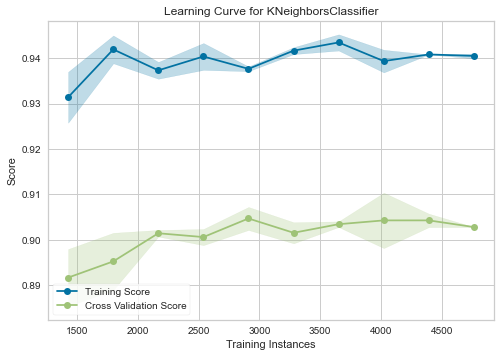

In [11]:
plot_model(estimator=knn, plot="learning")

In [12]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [13]:
predict_model(knn)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9119,0.9786,0.9241,0.9122,0.9119,0.8936,0.8936


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,EquivDiameter,Extent,Solidity,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Label,Score
0,-0.086342,-0.108033,-0.093833,-0.056743,-0.182889,-0.197097,-0.090618,0.152167,0.466242,0.338562,0.048545,0.131090,0.200602,0.348949,SIRA,SIRA,0.8
1,-0.298182,-0.281032,-0.165760,-0.507680,0.211998,0.200711,-0.323136,-0.335405,0.350175,0.283405,0.572735,0.064126,-0.186516,0.496692,DERMASON,DERMASON,1.0
2,0.751852,0.693095,0.576963,0.731774,0.376507,0.339173,0.711659,0.121537,-2.320913,-0.699126,-0.620477,-0.415458,-0.392106,-2.128984,CALI,CALI,1.0
3,-0.571417,-0.552564,-0.532449,-0.595172,-0.635646,-0.812926,-0.648827,-0.809321,-0.211756,0.453639,0.703146,0.745450,0.711308,-0.132707,DERMASON,DERMASON,1.0
4,-0.042142,-0.018863,-0.003462,-0.087763,0.066751,0.066163,-0.043951,0.593493,-1.557524,-0.047289,0.111370,-0.022026,-0.085417,-1.064684,SIRA,SIRA,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,0.067572,0.223992,0.368676,-0.428665,1.465546,0.995185,0.069412,-1.092693,-1.007999,-1.024900,0.542957,-0.530822,-1.196806,-2.587376,HOROZ,HOROZ,1.0
4080,-0.383555,-0.388833,-0.577299,0.138867,-1.489575,-2.966981,-0.421457,0.299922,0.262458,0.548969,-0.156098,1.323283,2.031848,0.654525,SEKER,SEKER,1.0
4081,1.107353,1.091859,0.865081,0.913350,0.742774,0.603488,1.011124,0.714573,-1.663796,-1.427339,-0.783194,-0.584750,-0.660300,-0.693095,BARBUNYA,BARBUNYA,1.0
4082,-0.744021,-0.705628,-0.542428,-1.168135,0.136427,0.132250,-0.873627,0.594097,-0.141901,0.261415,1.585405,0.439071,-0.116096,0.487114,DERMASON,DERMASON,1.0
